# 3.) Fehlende Werte, Werte außerhalb des Skalenbereichs, Zeilenduplikate

Wir wissen aus dem vorangegangenen Kapitel bereits, wie man ein Dataframe in Python erstellen kann. Bevor wir im nächsten Kapitel erstmals echte Daten aus einem bereits existierendem Datenfile laden werden, befasst sich dieses Kapitel damit, wie wir Werte identifizieren, die unplausibel sind und/oder offensichtlich nicht zu unseren vorgegebenen Skalenbandbreiten passen. Außerdem wird der Umgang mit fehlenden Werten und Zeilenduplikaten besprochen.

In [1]:
import pandas as pd

### 3.1) Fehlende Werte

Fehlende Werte werden in Python typischerweise mit 'NaN' (not a number) bezeichnet und stellen bei manchen Analysen ev. ein Problem dar.

##### Zuerst ein neues Dataframe erstellen

Erstellen wir zuerst mit bereits bekannter Methode ein neues Dataframe, in welches später fehlende Werte eingefügt werden sollen.

In [2]:
import numpy as np

daten = pd.DataFrame({'a' : np.random.randn(5), 'b' : np.random.randn(5)})

daten

,a,b
0,-0.231624,-0.436485
1,-0.514917,0.916378
2,-1.436841,-0.786471
3,0.371705,1.689001
4,-0.323062,-0.253596


##### Nun die fehlenden Werte einfügen

Mit folgender Methode können beliebige einzelne Werte geändert werden.

[pandas.DataFrame.at](https://pandas.pydata.org/pandas-docs/version/0.25/reference/api/pandas.DataFrame.at.html)

In [3]:
daten.at[0, 'a'] = None # Zeile 0 in Spalte 'a' wird geändert zu None
daten.at[1, 'b'] = 'NaN' # Zeile 1 in Spalte 'b' wird geändert zu 'NaN'
daten.at[4, 'a'] = None
# 'NaN' und None sind im Grunde nicht das Gleiche, für die Zwecke dieses Beispiels führen sie aber zum selben Ziel

daten

,a,b
0,NaN,-0.436485
1,-0.514917,NaN
2,-1.436841,-0.786471
3,0.371705,1.689001
4,NaN,-0.253596


##### Auf fehlende Werte prüfen

Wir haben 3 Werte unseres Datensatzes durch fehlende Werte ('NaN') ersetzt. Nun wollen wir prüfen, ob in unserem Datensatz fehlende Werte vorhanden sind (unser Beispiel ist mit 2 Spalten und 5 Zeilen leicht visuell überprüfbar, ein Datensatz mit 200 Spalten und 5000 Zeilen wäre das nicht mehr...). MIt **isnull()** bzw. **isna()** kann auf fehlende Werte geprüft werden. 

[DataFrame.isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html)

[DataFrame.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)

[How to check if any value is NaN in a Pandas DataFrame](https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe)

Bei überschaubaren Datensätzen kann folgende Methode angewandt werden. Wahrscheinlich erkennt man fehlende Werte aber durch reguläre Anzeige des Dataframes (siehe oben) schneller ('NaN').

In [4]:
print('\nBefinden sich fehlende Werte im Datensatz?')

daten.isnull() # alternativ: isna()


Befinden sich fehlende Werte im Datensatz?


,a,b
0,True,False
1,False,True
2,False,False
3,False,False
4,True,False


Ob überhaupt fehlende Werte an irgendeiner Stelle im Datensatz vorhanden sind, kann mit **isnull.values.any()** geprüft werden.

In [5]:
daten.isnull().values.any() # Im gesamten Dataframe

True

Eine Anzeige der Anzahl fehlender Werte pro Spalte (Variable) gelingt mit **isnull.sum()**.

In [6]:
daten.isnull().sum() # Pro Spalte (Variable)

a    2
b    1
dtype: int64

##### Wieviele fehlende Werte pro Spalte bzw. pro Zeile?

Man kann dies alles auch mit Hinweistexten ausbauen sowie getrennt nach Anzahl der fehlenden Werte für die Spalten und für die Zeilen suchen.

[12 Useful Pandas Techniques in Python for Data Manipulation](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)

In [7]:
def missing(x):
  return sum(x.isnull())

# Pro Spalte (Variable):
print("Fehlende Werte pro Spalte:")
print(daten.apply(missing, axis = 0)) # mit 'axis = 0' wird spaltenweise gesucht

# Pro Zeile:
print("\nFehlende Werte pro Zeile:")
print(daten.apply(missing, axis = 1).head(5)) # mit 'axis = 1' wird zeilenweise gesucht

Fehlende Werte pro Spalte:
a    2
b    1
dtype: int64

Fehlende Werte pro Zeile:
0    1
1    1
2    0
3    0
4    1
dtype: int64


##### Daten beschreiben, div. deskriptive Auswertungen

Sehen wir uns nun die Auswirkungen von fehlenden Werten auf div. deskriptive Kennzahlen an. Zuerst mit den fehlenden Werten ('NaN'), dann ohne die fehlenden Werte.

[DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [8]:
daten

,a,b
0,NaN,-0.436485
1,-0.514917,NaN
2,-1.436841,-0.786471
3,0.371705,1.689001
4,NaN,-0.253596


Wir sehen, dass die Funktion **describe()** die fehlenden Werte nicht berücksichtigt (vgl. Zeile *count*).

In [9]:
daten.describe()

,a,b
count,3.000000,4.000000
mean,-0.526684,0.053112
std,0.904330,1.112776
min,-1.436841,-0.786471
25%,-0.975879,-0.523982
50%,-0.514917,-0.345040
75%,-0.071606,0.232054
max,0.371705,1.689001


##### Fehlende Werte (ganze jeweilige Zeile) aus Dataframe entfernen

Wenn wir nur vollständige Datenzeilen möchten, können wir fehlende Werte zeilenweise entfernen (d.h. sobald in einer Zeile zumindest 1 fehlender Wert vorhanden ist, wird die ganze Zeile aus dem Dataframe entfernt). Die Funktion dafür ist **dropna()**. Sie kann auf das ganze Dataframe angewandt werden, oder mit *subset* auch nur auf einzelne Spalten (in denen dann nach fehlenden Werten gesucht wird - gelöscht wird aber natürlich die ganze Zeile, also auch die Werte in jenen Spalten, die nicht im *subset* waren!)

[DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna)

In [11]:
print('Fehlende Werte werden aus Datensatz entfernt')

daten.dropna(subset=['a', 'b'], inplace = True) # nur in Spalten a und b wird nach fehlenden Werten gesucht

# Soll in allen Spalten/Zeilen nach fehlenden Werten gesucht werden: daten.dopna()

Fehlende Werte werden aus Datensatz entfernt


##### Daten beschreiben, div. deskriptive Auswertungen

Wie wir unten sehen, wurden jene Spalten, in denen sich fehlende Werte befanden, aus dem Dataframe entfernt. Es befinden sich statt 5 nun nur mehr 2 Zeilen im Datensatz.

In [12]:
daten

,a,b
2,-1.436841,-0.786471
3,0.371705,1.689001


In [13]:
daten.describe()

,a,b
count,2.000000,2.000000
mean,-0.532568,0.451265
std,1.278834,1.750423
min,-1.436841,-0.786471
25%,-0.984704,-0.167603
50%,-0.532568,0.451265
75%,-0.080432,1.070133
max,0.371705,1.689001


### 3.2) Werte ausserhalb des Skalenbereichs

Oftmals sind in Datensätzen Werte zu entdecken, die nicht recht in Bild passen. Z.B. unplausible Werte (bspw. weist eine Person beim Alter 155 Jahre auf) oder Werte die über den vorgesehenen Skalenbereich hinausgehen (z.B. finden sich bei einer Variable, die Antworten auf einer Ratingskala von 1 bis 5 enthält, auch die Werte 6, 22 und 99). Solche Werte können auf unterschiedliche Weise zustande kommen. Bspw. kann es sich um Tippfehler bei der Dateneingabe handeln, es kann sich um 'scherzhafte' (unseriöse) Antworten von Probanden handeln oder es kann sich um echte Werte handeln, die für bestimmte Antwortkategorien stehen (so kann bei einer Ratingskala von 1 bis 5 der Wert 6 für 'weiß nicht', der Wert 7 für 'keine Angabe' und der Wert 99 bspw. für 'fehlend' stehen).

##### Zuerst Dataframe aus Zufallszahlen erstellen

Erstellen wir zuerst ein kurzes Dataframe, in welchem wir später div. 'unbrauchbare' Werte einfügen. Nehmen wir an, es handelt sich dabei um 2 Variablen, die jeweils Antworten auf einer 5-stufige Ratingskala (von 1 bis 5) enthalten.

In [14]:
data = pd.DataFrame({'Item A' : np.random.randint(1, 6, 5), 'Item B' : np.random.randint(1, 6, 5)})
# damit werden in 2 Variablen jeweils 5 Werte von 1-5(!) erzeugt (6 ist nicht mehr im Bereich)

In [15]:
data

,Item A,Item B
0,2,5
1,4,2
2,4,4
3,3,2
4,3,1


##### Nun Werte ausserhalb des Skalenbereichs (1-5) hinzufügen

Nun fügen wir mit der bereits von weiter oben bekannten Methode einige Werte hinzu, die eindeutig ausserhalb des Bereichs von 1 bis 5 liegen.

In [16]:
data.at[1, 'Item A'] = 6
data.at[3, 'Item B'] = 7
data.at[4, 'Item A'] = 11

data

,Item A,Item B
0,2,5
1,6,2
2,4,4
3,3,7
4,11,1


Mit **value_counts** (vgl. Kapitel 5 zur deskriptiven Analyse) kann die Häufigkeit der einzelnen Ausprägungen ermittelt werden. **sort_index()** sortiert die Ausgabe dabei nach den Merkmalsausprägungen und nicht nach den Häufigkeiten.

In [17]:
data['Item A'].value_counts().sort_index() # in der Ausgabe stehen links die Wertelabels, rechts die Häufigkeiten
# mit 'sort_index()' wird nach den Wertelabels und nicht nach den Häufigkeiten sortiert

2     1
3     1
4     1
6     1
11    1
Name: Item A, dtype: int64

In [18]:
data['Item B'].value_counts().sort_index()

1    1
2    1
4    1
5    1
7    1
Name: Item B, dtype: int64

Somit erkennen wir sofort, dass in Spalte *Item A* der Wert 6 und der Wert 11 je einmal vorkommen und in Spalte *Item B* der Wert 7 einmal vorkommt. Untenstehendes Streudiagramm ermöglicht das Erkennen dieser Werte auf grafischem Weg.

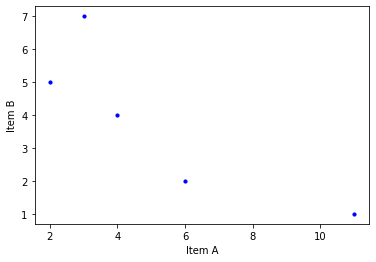

In [19]:
ax = data.plot.scatter(x = 'Item A', y = 'Item B', c = 'blue', s = 10) # 's' = Größe (size) der Punkte

##### Umgang mit diesen Werten ausserhalb des Skalenbereichs

Diese verzerren natürlich jegliche statistische Analyse. Zunächst ist der Grund für diese Werte in Erfahrung zu bringen:

Wenn es sich um Fehleingaben handelt müssen diese korrigiert werden.

Der Rest (nach Korrektur) soll im Rahmen der deskriptiven Analyse natürlich erfasst und dokumentiert werden,
z.B. weiß nicht, keine Angabe, div. Gründe der Antwortverweigerung, usw.

Für die statistischen Analysen schließlich müssen diese Werte aber ausgeschlossen werden, man könnte sie bspw. löschen.
Dabei ist es aber sinnvoll, dies nicht im Originaldatenfile zu machen, sondern dafür ein neues Datenfile anzulegen!

Mit der Funktion **replace()** können Werte durch beliebige andere Werte ersetzt werden. Im folgenden Beispiel werden die Werte 6, 7 und 11 durch fehlende Werte ersetzt.

[DataFrame.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

[numpy.nan](https://numpy.org/devdocs/reference/constants.html#numpy.nan)

In [23]:
neu1 = data.replace([6, 7, 11], np.nan)
# Werte werden im ganzen Dataframe auf einmal ersetzt und Dataframe wird unter neuem Namen gespeichert

In [24]:
neu1

,Item A,Item B
0,2.0,5.0
1,NaN,2.0
2,4.0,4.0
3,3.0,NaN
4,NaN,1.0


Im nächsten Beispiel werden nur die Werte 6 und 7 als fehlende Werte definiert. Der Wert 11 hat sich als Tippfehler bei der Eingabe herausgestellt und wird durch den korrekt Wert 1 ersetzt.

In [25]:
neu2 = data.replace({6: np.nan, 7: np.nan, 11: 1})
# Jeder Wert wird im ganzen Dataframe individuell durch einen anderen Wert ersetzt

In [26]:
neu2

,Item A,Item B
0,2.0,5.0
1,NaN,2.0
2,4.0,4.0
3,3.0,NaN
4,1.0,1.0


Man das Ersetzen von Werten auch für jede Spalte getrennt definieren (anstatt wie in den beiden vorangegangenen Beispielen für das gesamte Dataframe auf einmal). In nachfolgendem Beispiel werden bei *Item A* und *Item B* einige Werte durch beliebige unplausible Werte bzw. 'NaN' ersetzt.

In [31]:
neu3 = data.replace({'Item A' : {4: 666, 6: 667},  'Item B' : {5: 99, 1: 999, 7: np.nan}})
# Die Werte werden pro Spalte durch einen anderen Wert ersetzt

In [32]:
neu3

,Item A,Item B
0,2,99.0
1,667,2.0
2,666,4.0
3,3,NaN
4,11,999.0


##### Zeilen mit bestimmten Werten ausfindig machen

Wie bereits an früherer Stelle erwähnt, können kurze überschaubare Dataframes - wie sie in diesen Beispielen dargestellt sind - leicht visuell überprüft werden. Bei großen Datensätzen ist dies keine geeignete Strategie. Mit **loc** können spezifische Werte gesucht und angezeigt werden. Sucht man, wie in folgendem Beispiel, in Spalte *Item A* nach dem Wert 11, so zeigt das Ergebnis, dass sich dieser in Zeile 4 (eigentlich Zeile 5, da Pandas die Zeilennummerierung bei 0 beginnt) befindet.

[Select rows from a DataFrame based on values in a column in pandas](https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas)

In [34]:
neu3.loc[neu3['Item A'] == 11]

,Item A,Item B
4,11,999.0


Man kann auch in beiden (oder mehreren, falls vorhanden) Spalten nach Werten suchen, wie folgendes Beispiel zeigt. Hier wird nach Zeilen gesucht, die in beiden Spalten Werte aufweisen die >= 5 sind.

In [35]:
neu3.loc[(neu3['Item A'] >= 5) & (neu3['Item B'] >= 5)]

,Item A,Item B
4,11,999.0


##### Werte ausserhalb des Skalenbereichs ersetzen bzw. löschen

Alle Werte, die außerhalb des vorgesehenen Skalenbereichs liegen, können mit einem Befehl ersetzt werden. Im Folgenden werden mit der Funktion **where()** in beiden Spalten sämtliche Werte, die nicht <=5 sind, durch 'NaN' ersetzt.

In [36]:
neu4 = neu3.where(neu3[['Item A', 'Item B']] <=5, np.nan)
# Werte, bei denen die angeführte Bedingung (<=5) nicht zutrifft, werden durch NaN (oder beliebigen anderen Wert) ersetzt!

In [37]:
neu4

,Item A,Item B
0,2.0,NaN
1,NaN,2.0
2,NaN,4.0
3,3.0,NaN
4,NaN,NaN


### 3.3) Doppelte Einträge, z.B. die gleiche Zeile mehrmals im Datensatz vorhanden

In großen Datensätzen macht es durchaus Sinn, nach Zeilenduplikaten Ausschau zu halten. Zeilenduplikate sind jene, die bei allen Variablen (Spalten) identische Werte aufweisen. Selbstverständlich kann das in der Realität vorkommen, manchmal ist dies jedoch auch ein Hinweis auf Fehleingaben oder gar Fälschungen von Daten. Mit der Funktion **duplicated()** wird für jede Zeile angezeigt, ob sie mehrfach vorhanden ist (True) oder nicht (False).

[DataFrame.duplicated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)

[Pandas : Find duplicate rows in a Dataframe based on all or selected columns using DataFrame.duplicated() in Python](https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/)

In [38]:
data.duplicated(subset = ['Item A', 'Item B'], keep = False) # Mit 'subset' wird nur in den beiden angegebenen Spalten gesucht

0    False
1    False
2    False
3    False
4    False
dtype: bool

Alternativ kann man dies folgendermaßen schreiben:

In [41]:
doppelt = data[data.duplicated(['Item A', 'Item B'], keep = False)]
 
print("Gleiche Einträge finden sich in folgenden Zeilen:\n", doppelt, sep = '\n')

Gleiche Einträge finden sich in folgenden Zeilen:

Empty DataFrame
Columns: [Item A, Item B]
Index: []


Glück gehabt, es wurden keine Zeilenduplikate gefunden!

Man könnte auch nur in einer Spalte suchen. Das macht bei großen Datensätzen für die meisten Variablen keinen Sinn, da meist sehr viele idente Nennungen für jede Merkmalsausprägung vorliegen werden. Dennoch gibt es dafür Anwendungsfälle, z.B. ein Datensatz mit Sozialversicherungsnummmern oder Matrikelnummern oder Autokennzeichen - diese sollten alle nur jeweils einmal vorkommen.

In [43]:
ident = data[data.duplicated(['Item A'], keep = False)]
 
print("Idente Einträge finden sich in folgenden Zeilen:\n", ident, sep = '\n')

Idente Einträge finden sich in folgenden Zeilen:

Empty DataFrame
Columns: [Item A, Item B]
Index: []


Auch innerhalb von Spalte *Item A* wurden keine doppelten Einträge gefunden.